In [1]:
library(wooldridge)
library(stargazer)
library(knitr)


Please cite as: 

 Hlavac, Marek (2018). stargazer: Well-Formatted Regression and Summary Statistics Tables.
 R package version 5.2.2. https://CRAN.R-project.org/package=stargazer 



In [1]:
pacman::p_load(wooldridge,stargazer,broom,tidyverse,ggplot2,
               dplyr,tidyr,moderndive,jtools,sjPlot,dotwhisker,FSA,
               car,QuantPsyc)

# Example 9.1

In [4]:


data("crime1")

lm.9.1.1 <- lm(narr86 ~ pcnv + avgsen + tottime + ptime86 + 
                 qemp86 + inc86 + black + hispan, data = crime1)
summary(lm.9.1.1)


Call:
lm(formula = narr86 ~ pcnv + avgsen + tottime + ptime86 + qemp86 + 
    inc86 + black + hispan, data = crime1)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.0108 -0.4518 -0.2392  0.2707 11.5284 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.5686855  0.0360461  15.777  < 2e-16 ***
pcnv        -0.1332344  0.0403502  -3.302 0.000973 ***
avgsen      -0.0113177  0.0122401  -0.925 0.355233    
tottime      0.0120224  0.0094352   1.274 0.202698    
ptime86     -0.0408417  0.0088120  -4.635 3.74e-06 ***
qemp86      -0.0505398  0.0144397  -3.500 0.000473 ***
inc86       -0.0014887  0.0003406  -4.370 1.29e-05 ***
black        0.3265035  0.0454156   7.189 8.38e-13 ***
hispan       0.1939144  0.0397113   4.883 1.10e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8286 on 2716 degrees of freedom
Multiple R-squared:  0.07232,	Adjusted R-squared:  0.06959 
F-statistic: 26.47 on 8 and 2716 DF,

In [5]:
# Seems to be an error in the book.
# Although all coefficients and their standard errors are equal
# the intercept term is 0.569 instead of 0.596.

In [6]:
lm.9.1.2 <- lm(narr86 ~ pcnv + avgsen + tottime + ptime86 + 
                 qemp86 + inc86 + black + hispan + pcnvsq + 
                 pt86sq + inc86sq, data = crime1)
summary(lm.9.1.2)


Call:
lm(formula = narr86 ~ pcnv + avgsen + tottime + ptime86 + qemp86 + 
    inc86 + black + hispan + pcnvsq + pt86sq + inc86sq, data = crime1)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.5248 -0.4646 -0.2151  0.2276 11.4286 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  5.046e-01  3.684e-02  13.699  < 2e-16 ***
pcnv         5.525e-01  1.542e-01   3.582 0.000347 ***
avgsen      -1.702e-02  1.205e-02  -1.412 0.158028    
tottime      1.195e-02  9.282e-03   1.288 0.197924    
ptime86      2.874e-01  4.426e-02   6.494 9.88e-11 ***
qemp86      -1.409e-02  1.736e-02  -0.812 0.416970    
inc86       -3.415e-03  8.037e-04  -4.249 2.22e-05 ***
black        2.923e-01  4.483e-02   6.520 8.35e-11 ***
hispan       1.636e-01  3.945e-02   4.147 3.47e-05 ***
pcnvsq      -7.302e-01  1.561e-01  -4.677 3.05e-06 ***
pt86sq      -2.961e-02  3.863e-03  -7.664 2.50e-14 ***
inc86sq      7.186e-06  2.556e-06   2.811 0.004969 ** 
---
Signif. codes:  0 ‘***’ 0.

In [7]:
anova(lm.9.1.1, lm.9.1.2)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
2716,1864.957,NA,NA,NA,NA
2713,1802.368,3,62.5889,31.40381,5.965856e-20


# Example 9.2

In [8]:


data("hprice1")

lm.9.2.1 <- lm(price ~ lotsize + sqrft + bdrms, data = hprice1)
fit2.1 <- lm.9.2.1$fitted.values^2
fit3.1 <- lm.9.2.1$fitted.values^3
lm.9.2.1.reset <- lm(price ~ lotsize + sqrft + bdrms + fit2.1 + fit3.1, data = hprice1)
anova(lm.9.2.1, lm.9.2.1.reset)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
84,300723.8,NA,NA,NA,NA
82,269983.8,2,30740,4.668206,0.01202171


In [9]:
lm.9.2.2 <- lm(lprice ~ llotsize + lsqrft + bdrms, data = hprice1)
fit2.2 <- lm.9.2.2$fitted.values^2
fit3.2 <- lm.9.2.2$fitted.values^3
lm.9.2.2.reset <- lm(lprice ~ llotsize + lsqrft + bdrms + fit2.2 + fit3.2, data = hprice1)
anova(lm.9.2.2, lm.9.2.2.reset)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
84,2.862563,NA,NA,NA,NA
82,2.694020,2,0.1685435,2.565046,0.08307547


# Table 9.2

In [10]:
data("wage2")

lm.t9.2.1 <- lm(lwage ~ educ + exper + tenure + married + south + urban + 
                  black, data = wage2)
summary(lm.t9.2.1)


Call:
lm(formula = lwage ~ educ + exper + tenure + married + south + 
    urban + black, data = wage2)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.98069 -0.21996  0.00707  0.24288  1.22822 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  5.395497   0.113225  47.653  < 2e-16 ***
educ         0.065431   0.006250  10.468  < 2e-16 ***
exper        0.014043   0.003185   4.409 1.16e-05 ***
tenure       0.011747   0.002453   4.789 1.95e-06 ***
married      0.199417   0.039050   5.107 3.98e-07 ***
south       -0.090904   0.026249  -3.463 0.000558 ***
urban        0.183912   0.026958   6.822 1.62e-11 ***
black       -0.188350   0.037667  -5.000 6.84e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3655 on 927 degrees of freedom
Multiple R-squared:  0.2526,	Adjusted R-squared:  0.2469 
F-statistic: 44.75 on 7 and 927 DF,  p-value: < 2.2e-16


In [11]:
lm.t9.2.2 <- lm(lwage ~ educ + exper + tenure + married + south + urban + 
                  black + IQ, data=wage2)
summary(lm.t9.2.2)


Call:
lm(formula = lwage ~ educ + exper + tenure + married + south + 
    urban + black + IQ, data = wage2)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.01203 -0.22244  0.01017  0.22951  1.27478 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  5.1764392  0.1280006  40.441  < 2e-16 ***
educ         0.0544106  0.0069285   7.853 1.12e-14 ***
exper        0.0141458  0.0031651   4.469 8.82e-06 ***
tenure       0.0113951  0.0024394   4.671 3.44e-06 ***
married      0.1997644  0.0388025   5.148 3.21e-07 ***
south       -0.0801695  0.0262529  -3.054 0.002325 ** 
urban        0.1819463  0.0267929   6.791 1.99e-11 ***
black       -0.1431253  0.0394925  -3.624 0.000306 ***
IQ           0.0035591  0.0009918   3.589 0.000350 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3632 on 926 degrees of freedom
Multiple R-squared:  0.2628,	Adjusted R-squared:  0.2564 
F-statistic: 41.27 on 8 and 926 DF,  p

In [12]:
lm.t9.2.3 <- lm(lwage ~ educ + exper + tenure + married + south + urban + 
                black + IQ + IQ*educ, data = wage2)
summary(lm.t9.2.3)


Call:
lm(formula = lwage ~ educ + exper + tenure + married + south + 
    urban + black + IQ + IQ * educ, data = wage2)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.00733 -0.21715  0.01177  0.23456  1.27305 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  5.6482483  0.5462963  10.339  < 2e-16 ***
educ         0.0184559  0.0410608   0.449 0.653192    
exper        0.0139072  0.0031768   4.378 1.34e-05 ***
tenure       0.0113929  0.0024397   4.670 3.46e-06 ***
married      0.2008658  0.0388267   5.173 2.82e-07 ***
south       -0.0802354  0.0262560  -3.056 0.002308 ** 
urban        0.1835758  0.0268586   6.835 1.49e-11 ***
black       -0.1466989  0.0397013  -3.695 0.000233 ***
IQ          -0.0009418  0.0051625  -0.182 0.855289    
educ:IQ      0.0003399  0.0003826   0.888 0.374564    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3632 on 925 degrees of freedom
Multiple R-squared:  0.2634,	

In [16]:
stargazer(type = "text",
          lm.t9.2.1, 
          lm.t9.2.2,  
          lm.t9.2.3,
          single.row = TRUE, header = FALSE, digits=5)


                                                 Dependent variable:                             
                    -----------------------------------------------------------------------------
                                                        lwage                                    
                               (1)                       (2)                       (3)           
-------------------------------------------------------------------------------------------------
educ                  0.06543*** (0.00625)      0.05441*** (0.00693)        0.01846 (0.04106)    
exper                 0.01404*** (0.00319)      0.01415*** (0.00317)      0.01391*** (0.00318)   
tenure                0.01175*** (0.00245)      0.01140*** (0.00244)      0.01139*** (0.00244)   
married               0.19942*** (0.03905)      0.19976*** (0.03880)      0.20087*** (0.03883)   
south                 -0.09090*** (0.02625)     -0.08017*** (0.02625)     -0.08024*** (0.02626)  
urban              

# Example 9.4

In [13]:


data("crime2")

lm.9.4.1 <- lm(lcrmrte ~ unem + llawexpc, data = crime2, subset = (d87==1))
summary(lm.9.4.1)


Call:
lm(formula = lcrmrte ~ unem + llawexpc, data = crime2, subset = (d87 == 
    1))

Residuals:
     Min       1Q   Median       3Q      Max 
-0.64786 -0.22955 -0.06368  0.22183  0.71164 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  3.34290    1.25053   2.673   0.0106 *
unem        -0.02900    0.03234  -0.897   0.3748  
llawexpc     0.20337    0.17265   1.178   0.2453  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3231 on 43 degrees of freedom
Multiple R-squared:  0.05712,	Adjusted R-squared:  0.01326 
F-statistic: 1.302 on 2 and 43 DF,  p-value: 0.2824


In [14]:
lm.9.4.2 <- lm(lcrmrte ~ unem + llawexpc + lcrmrt_1, data = crime2, subset = (d87==1))
summary(lm.9.4.2)


Call:
lm(formula = lcrmrte ~ unem + llawexpc + lcrmrt_1, data = crime2, 
    subset = (d87 == 1))

Residuals:
     Min       1Q   Median       3Q      Max 
-0.48081 -0.12202  0.00659  0.14658  0.34428 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.076451   0.821143   0.093    0.926    
unem         0.008621   0.019517   0.442    0.661    
llawexpc    -0.139576   0.108641  -1.285    0.206    
lcrmrt_1     1.193923   0.132099   9.038  2.1e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1905 on 42 degrees of freedom
Multiple R-squared:  0.6798,	Adjusted R-squared:  0.657 
F-statistic: 29.73 on 3 and 42 DF,  p-value: 1.799e-10


In [15]:
stargazer(type = "text",
          lm.9.4.1, 
          lm.9.4.2,  
          single.row = TRUE, header = FALSE, digits=5)


                                 Dependent variable:             
                    ---------------------------------------------
                                       lcrmrte                   
                            (1)                    (2)           
-----------------------------------------------------------------
unem                 -0.02900 (0.03234)     0.00862 (0.01952)    
llawexpc             0.20337 (0.17265)      -0.13958 (0.10864)   
lcrmrt_1                                   1.19392*** (0.13210)  
Constant            3.34290** (1.25053)     0.07645 (0.82114)    
-----------------------------------------------------------------
Observations                 46                     46           
R2                        0.05712                0.67983         
Adjusted R2               0.01326                0.65696         
Residual Std. Error  0.32314 (df = 43)      0.19053 (df = 42)    
F Statistic         1.30239 (df = 2; 43) 29.72674*** (df = 3; 42)
Note:    

# Example 9.8: R&D Intensity and Firm Size
$$rdintens = \beta_0 + \beta_1sales + \beta_2profmarg + \mu$$

From Businessweek R&D Scoreboard, October 25, 1991. Load the data and estimate the model.

In [17]:
data("rdchem")

lm.9.8.1 <- lm(rdintens ~ sales + profmarg, data = rdchem)
summary(lm.9.8.1)


Call:
lm(formula = rdintens ~ sales + profmarg, data = rdchem)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.2221 -1.1414 -0.6068  0.5008  6.3702 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2.625e+00  5.855e-01   4.484 0.000106 ***
sales       5.338e-05  4.407e-05   1.211 0.235638    
profmarg    4.462e-02  4.618e-02   0.966 0.341966    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.862 on 29 degrees of freedom
Multiple R-squared:  0.07612,	Adjusted R-squared:  0.0124 
F-statistic: 1.195 on 2 and 29 DF,  p-value: 0.3173


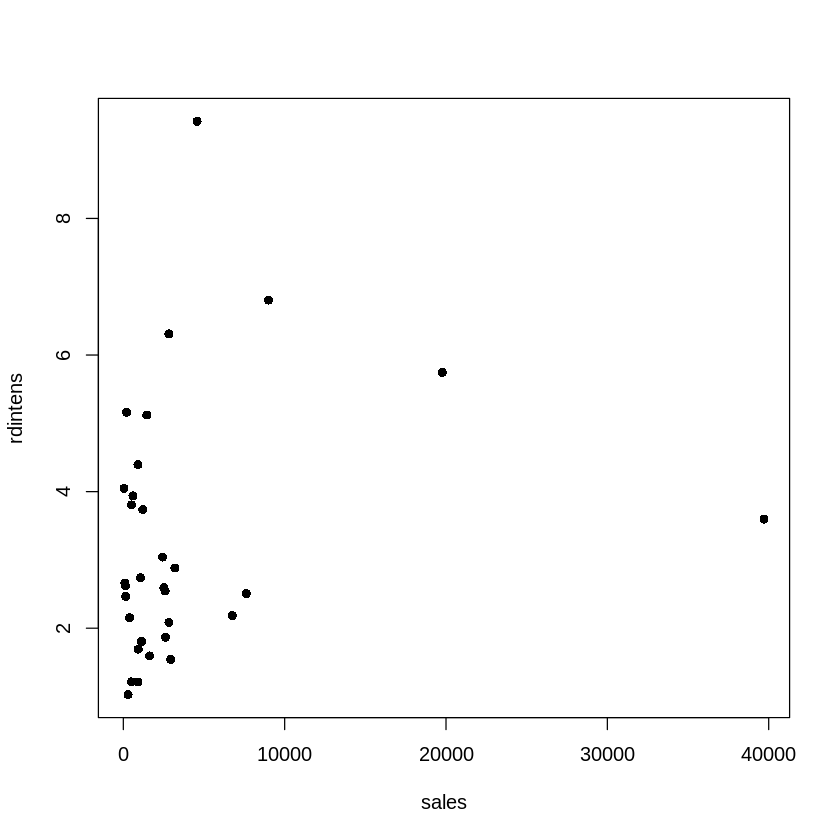

In [18]:
# See the outliers
with(rdchem, plot(sales, rdintens, pch = 16))

In [19]:
# Test without the biggest firm
lm.9.8.2 <- lm(rdintens ~ sales + profmarg, data = rdchem, subset = (sales < 30000))
summary(lm.9.8.2)


Call:
lm(formula = rdintens ~ sales + profmarg, data = rdchem, subset = (sales < 
    30000))

Residuals:
    Min      1Q  Median      3Q     Max 
-2.0687 -1.1867 -0.7956  0.6486  6.0811 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2.2968508  0.5918045   3.881 0.000577 ***
sales       0.0001856  0.0000842   2.204 0.035883 *  
profmarg    0.0478411  0.0444831   1.075 0.291336    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.792 on 28 degrees of freedom
Multiple R-squared:  0.1728,	Adjusted R-squared:  0.1137 
F-statistic: 2.925 on 2 and 28 DF,  p-value: 0.07022


In [20]:
# Dummy for the biggest firm
big <- as.numeric(rdchem$sales == max(rdchem$sales))
lm.9.8.3 <- lm(rdintens ~ sales + profmarg + big, data = rdchem)
summary(lm.9.8.3)


Call:
lm(formula = rdintens ~ sales + profmarg + big, data = rdchem)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.0687 -1.1218 -0.6207  0.6384  6.0811 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.2968508  0.5918045   3.881 0.000577 ***
sales        0.0001856  0.0000842   2.204 0.035883 *  
profmarg     0.0478411  0.0444831   1.075 0.291336    
big         -6.5717169  3.6147274  -1.818 0.079773 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.792 on 28 degrees of freedom
Multiple R-squared:  0.1737,	Adjusted R-squared:  0.08513 
F-statistic: 1.962 on 3 and 28 DF,  p-value: 0.1427


In [21]:
# Dummy for highest rdintens
hi.rdint <- as.numeric(rdchem$rdintens == max(rdchem$rdintens))
lm.9.8.4 <- lm(rdintens ~ sales + profmarg + hi.rdint, data = rdchem)
summary(lm.9.8.4)



Call:
lm(formula = rdintens ~ sales + profmarg + hi.rdint, data = rdchem)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.1920 -1.0442 -0.3307  0.5016  3.5413 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2.193e+00  4.615e-01   4.753 5.45e-05 ***
sales       5.057e-05  3.400e-05   1.487   0.1481    
profmarg    6.829e-02  3.600e-02   1.897   0.0681 .  
hi.rdint    6.718e+00  1.475e+00   4.555 9.35e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.436 on 28 degrees of freedom
Multiple R-squared:  0.4693,	Adjusted R-squared:  0.4125 
F-statistic: 8.255 on 3 and 28 DF,  p-value: 0.0004321


In [22]:
lm.9.8.5 <- lm(rdintens ~ sales + profmarg, data = rdchem, subset = (rdintens  < max(rdintens)))
summary(lm.9.8.5)


Call:
lm(formula = rdintens ~ sales + profmarg, data = rdchem, subset = (rdintens < 
    max(rdintens)))

Residuals:
    Min      1Q  Median      3Q     Max 
-2.1920 -1.0711 -0.5777  0.5182  3.5413 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2.193e+00  4.615e-01   4.753 5.45e-05 ***
sales       5.057e-05  3.400e-05   1.487   0.1481    
profmarg    6.829e-02  3.600e-02   1.897   0.0681 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.436 on 28 degrees of freedom
Multiple R-squared:  0.1716,	Adjusted R-squared:  0.1125 
F-statistic:   2.9 on 2 and 28 DF,  p-value: 0.07165


In [23]:
# Without first and tenth firm
lm.9.8.6 <- lm(rdintens ~ sales + profmarg, 
               data = rdchem,
               subset = (sales < max(sales) & rdintens < max(rdintens)))
summary(lm.9.8.6)


Call:
lm(formula = rdintens ~ sales + profmarg, data = rdchem, subset = (sales < 
    max(sales) & rdintens < max(rdintens)))

Residuals:
    Min      1Q  Median      3Q     Max 
-2.0667 -1.0609 -0.3414  0.6422  3.1439 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.939e+00  4.588e-01   4.226 0.000243 ***
sales       1.596e-04  6.457e-05   2.472 0.020029 *  
profmarg    7.007e-02  3.433e-02   2.041 0.051116 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.369 on 27 degrees of freedom
Multiple R-squared:  0.2711,	Adjusted R-squared:  0.2171 
F-statistic: 5.021 on 2 and 27 DF,  p-value: 0.014


In [24]:
lm.9.8.7 <- lm(rdintens ~ sales + profmarg + big + hi.rdint, data = rdchem)
summary(lm.9.8.7)


Call:
lm(formula = rdintens ~ sales + profmarg + big + hi.rdint, data = rdchem)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.0667 -1.0604 -0.1891  0.6416  3.1439 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.939e+00  4.588e-01   4.226 0.000243 ***
sales        1.596e-04  6.457e-05   2.472 0.020029 *  
profmarg     7.007e-02  3.433e-02   2.041 0.051116 .  
big         -5.414e+00  2.773e+00  -1.953 0.061306 .  
hi.rdint     6.467e+00  1.412e+00   4.581  9.4e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.369 on 27 degrees of freedom
Multiple R-squared:  0.535,	Adjusted R-squared:  0.4661 
F-statistic: 7.766 on 4 and 27 DF,  p-value: 0.0002664


In [32]:
stargazer(type = "text",
          lm.9.8.1, 
          lm.9.8.2, 
         lm.9.8.3,
          lm.9.8.4,
         # lm.9.8.5,
#           lm.9.8.6,
#           lm.9.8.7,
          single.row = TRUE, header = FALSE, digits=5)


                                                      Dependent variable:                                  
                    ---------------------------------------------------------------------------------------
                                                           rdintens                                        
                            (1)                   (2)                  (3)                    (4)          
-----------------------------------------------------------------------------------------------------------
sales                0.00005 (0.00004)    0.00019** (0.00008)  0.00019** (0.00008)     0.00005 (0.00003)   
profmarg             0.04462 (0.04618)     0.04784 (0.04448)    0.04784 (0.04448)     0.06829* (0.03600)   
big                                                            -6.57172* (3.61473)                         
hi.rdint                                                                             6.71810*** (1.47487)  
Constant            2.62526

In [33]:
stargazer(type = "text",
#           lm.9.8.1, 
#           lm.9.8.2, 
         # lm.9.8.3,
          lm.9.8.4,
         lm.9.8.5,
          lm.9.8.6,
          lm.9.8.7,
          single.row = TRUE, header = FALSE, digits=5)


                                                        Dependent variable:                                     
                    --------------------------------------------------------------------------------------------
                                                              rdintens                                          
                              (1)                    (2)                   (3)                     (4)          
----------------------------------------------------------------------------------------------------------------
sales                  0.00005 (0.00003)      0.00005 (0.00003)    0.00016** (0.00006)     0.00016** (0.00006)  
profmarg              0.06829* (0.03600)     0.06829* (0.03600)     0.07007* (0.03433)     0.07007* (0.03433)   
big                                                                                        -5.41431* (2.77287)  
hi.rdint             6.71810*** (1.47487)                                                 6.466

In [2]:
data("rdchem")

all_rdchem <- lm(rdintens ~ sales + profmarg, data = rdchem) 


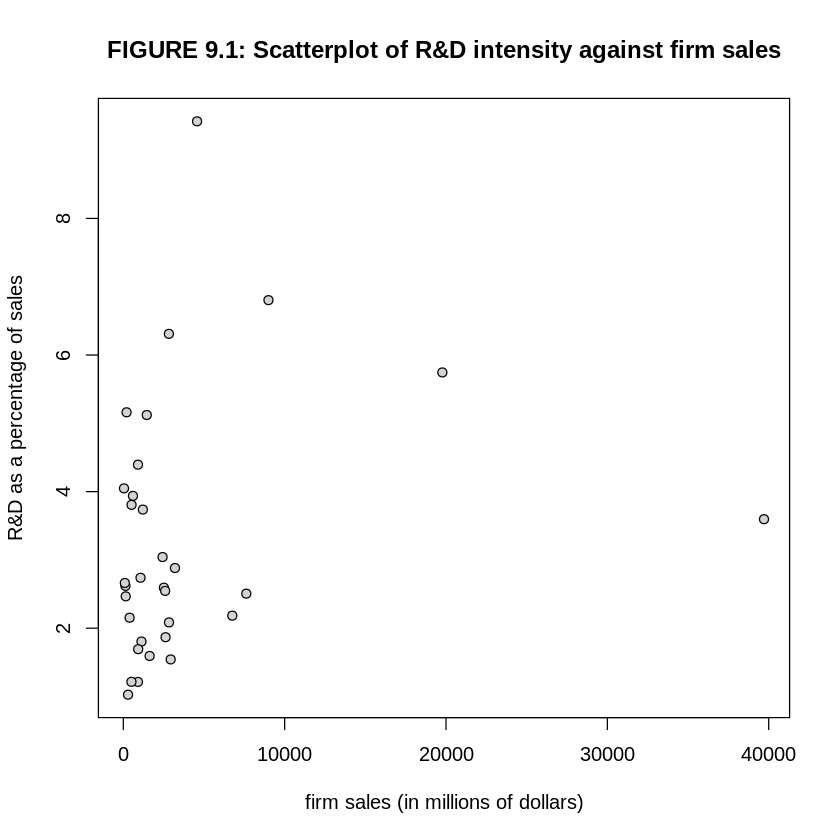

In [3]:
plot_title <- "FIGURE 9.1: Scatterplot of R&D intensity against firm sales"
x_axis <- "firm sales (in millions of dollars)"
y_axis <- "R&D as a percentage of sales"

plot(rdintens ~ sales, pch = 21, bg = "lightgrey", data = rdchem, main = plot_title, xlab = x_axis, ylab = y_axis)

In [8]:
smallest_rdchem <- lm(rdintens ~ sales + profmarg, data = rdchem, 
                      subset = (sales < max(sales)))

In [9]:
stargazer(type = "text",all_rdchem, smallest_rdchem,  single.row = TRUE, header = FALSE, digits=5)


                               Dependent variable:            
                    ------------------------------------------
                                     rdintens                 
                            (1)                   (2)         
--------------------------------------------------------------
sales                0.00005 (0.00004)    0.00019** (0.00008) 
profmarg             0.04462 (0.04618)     0.04784 (0.04448)  
Constant            2.62526*** (0.58553) 2.29685*** (0.59180) 
--------------------------------------------------------------
Observations                 32                   31          
R2                        0.07612               0.17281       
Adjusted R2               0.01240               0.11372       
Residual Std. Error  1.86205 (df = 29)     1.79218 (df = 28)  
F Statistic         1.19465 (df = 2; 29) 2.92476* (df = 2; 28)
Note:                              *p<0.1; **p<0.05; ***p<0.01


# Example 9.9

In [34]:


data("rdchem")

lm.9.9.1 <- lm(lrd ~ lsales + profmarg, data = rdchem)
summary(lm.9.9.1)


Call:
lm(formula = lrd ~ lsales + profmarg, data = rdchem)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.97681 -0.31502 -0.05828  0.39020  1.21783 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -4.37827    0.46802  -9.355 2.93e-10 ***
lsales       1.08422    0.06020  18.012  < 2e-16 ***
profmarg     0.02166    0.01278   1.694    0.101    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5136 on 29 degrees of freedom
Multiple R-squared:  0.918,	Adjusted R-squared:  0.9123 
F-statistic: 162.2 on 2 and 29 DF,  p-value: < 2.2e-16


In [35]:
# Without the largest firm
lm.9.9.2 <- lm(lrd ~ lsales + profmarg, data = rdchem, subset = (lsales  < max(lsales)))
summary(lm.9.9.2)


Call:
lm(formula = lrd ~ lsales + profmarg, data = rdchem, subset = (lsales < 
    max(lsales)))

Residuals:
     Min       1Q   Median       3Q      Max 
-0.97871 -0.31809 -0.05582  0.38978  1.21104 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -4.40414    0.51102  -8.618 2.30e-09 ***
lsales       1.08805    0.06711  16.212 9.21e-16 ***
profmarg     0.02176    0.01302   1.670    0.106    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5225 on 28 degrees of freedom
Multiple R-squared:  0.9037,	Adjusted R-squared:  0.8968 
F-statistic: 131.4 on 2 and 28 DF,  p-value: 5.877e-15


# Example 9.10

In [36]:


data("infmrt")

lm.9.10.1 <- lm(infmort ~ lpcinc + lphysic + lpopul, data = infmrt, subset = (year==1990))
summary(lm.9.10.1)


Call:
lm(formula = infmort ~ lpcinc + lphysic + lpopul, data = infmrt, 
    subset = (year == 1990))

Residuals:
    Min      1Q  Median      3Q     Max 
-4.0811 -1.2064 -0.0521  1.0639  7.9589 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept) 33.85931   20.42785   1.658  0.10408   
lpcinc      -4.68466    2.60412  -1.799  0.07845 . 
lphysic      4.15326    1.51266   2.746  0.00853 **
lpopul      -0.08782    0.28725  -0.306  0.76116   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.058 on 47 degrees of freedom
Multiple R-squared:  0.1391,	Adjusted R-squared:  0.08413 
F-statistic: 2.531 on 3 and 47 DF,  p-value: 0.06841


In [37]:
lm.9.10.2 <- lm(infmort ~ lpcinc + lphysic + lpopul, data = infmrt, subset = (year==1990 & DC==0))
summary(lm.9.10.2)


Call:
lm(formula = infmort ~ lpcinc + lphysic + lpopul, data = infmrt, 
    subset = (year == 1990 & DC == 0))

Residuals:
     Min       1Q   Median       3Q      Max 
-2.49645 -0.81641 -0.05117  0.94204  2.60772 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  23.9548    12.4195   1.929  0.05994 . 
lpcinc       -0.5669     1.6412  -0.345  0.73134   
lphysic      -2.7418     1.1908  -2.303  0.02588 * 
lpopul        0.6292     0.1911   3.293  0.00191 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.246 on 46 degrees of freedom
Multiple R-squared:  0.2732,	Adjusted R-squared:  0.2258 
F-statistic: 5.763 on 3 and 46 DF,  p-value: 0.001967
